In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
combined_L2_data_df = pd.DataFrame()
datasets = ['level5', 'L1000']
models = ['vanilla','beta','mmd','pca','complete']

model_names = ['Vanilla VAE','β-VAE','MMD-VAE','PCA','Original']


for dataset in datasets:
    for model in models:
        if dataset != 'L1000':
            L2_data = pd.read_csv('L2_distances/' + dataset + '_PEARSON_general_' + model + '.tsv', sep='\t').drop('Unnamed: 0', axis = 1).mean()
        else:
            L2_data = pd.read_csv('../../L1000/3.application/L2_distances/L1000_PEARSON_general_' + model  + '.tsv', sep='\t').drop('Unnamed: 0', axis = 1).mean()
                
        if model == 'beta':
            model_label = 'β-VAE'
        if model == 'mmd':
            model_label = 'MMD-VAE'
        if model == 'vanilla':
            model_label = 'Vanilla VAE'
        if model == 'pca':
            model_label = 'PCA'
        if model == 'complete':
            model_label = 'Orignal'
        
        
        dataset_label = dataset
        if dataset == 'level4':
            dataset_label = 'Cell Painting\nLevel 4'
        if dataset == 'level5':
            dataset_label = 'Cell Painting'
        
        combined_L2_data_df = combined_L2_data_df.append([[model_label, dataset_label, L2_data['Unshuffled']],
                                                          [model_label + ' Shuffled', dataset_label, L2_data['Shuffled']]
                                                         ])



In [3]:
combined_L2_data_df.columns = ['model','dataset','L2']
combined_L2_data_df['shuffled'] = combined_L2_data_df['model'].str.contains('Shuffled')

In [4]:
#0-1 normalizing in each dataset
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# combined_L2_data_df = pd.DataFrame(combined_L2_data).transpose()
# combined_L2_data_df_scaled = pd.DataFrame(min_max_scaler.fit_transform(combined_L2_data_df), columns = combined_L2_data_df.columns, index = combined_L2_data_df.index).transpose()
# combined_L2_data = combined_L2_data_df_scaled.to_dict()
#df.loc[df['B'] == 1, 'A'] += 10
dataset_labels = ['Cell Painting','L1000']
for dataset_label in dataset_labels:
    max_mean = max(combined_L2_data_df[combined_L2_data_df['dataset'] == dataset_label].L2)
    min_mean = min(combined_L2_data_df[combined_L2_data_df['dataset'] == dataset_label].L2)

    combined_L2_data_df.loc[combined_L2_data_df['dataset'] == dataset_label, 'L2'] -= min_mean
    combined_L2_data_df.loc[combined_L2_data_df['dataset'] == dataset_label, 'L2'] /= (max_mean - min_mean)

In [4]:
combined_L2_data_df

,model,dataset,L2,shuffled
0,Vanilla VAE,Cell Painting,0.921625,False
1,Vanilla VAE Shuffled,Cell Painting,0.898292,True
0,β-VAE,Cell Painting,0.926433,False
1,β-VAE Shuffled,Cell Painting,0.894445,True
0,MMD-VAE,Cell Painting,0.926780,False
1,MMD-VAE Shuffled,Cell Painting,0.897059,True
0,PCA,Cell Painting,0.902685,False
1,PCA Shuffled,Cell Painting,0.878900,True
0,Orignal,Cell Painting,0.897515,False
1,Orignal Shuffled,Cell Painting,0.877615,True


['Vanilla VAE', 'β-VAE', 'MMD-VAE', 'PCA', 'Orignal']


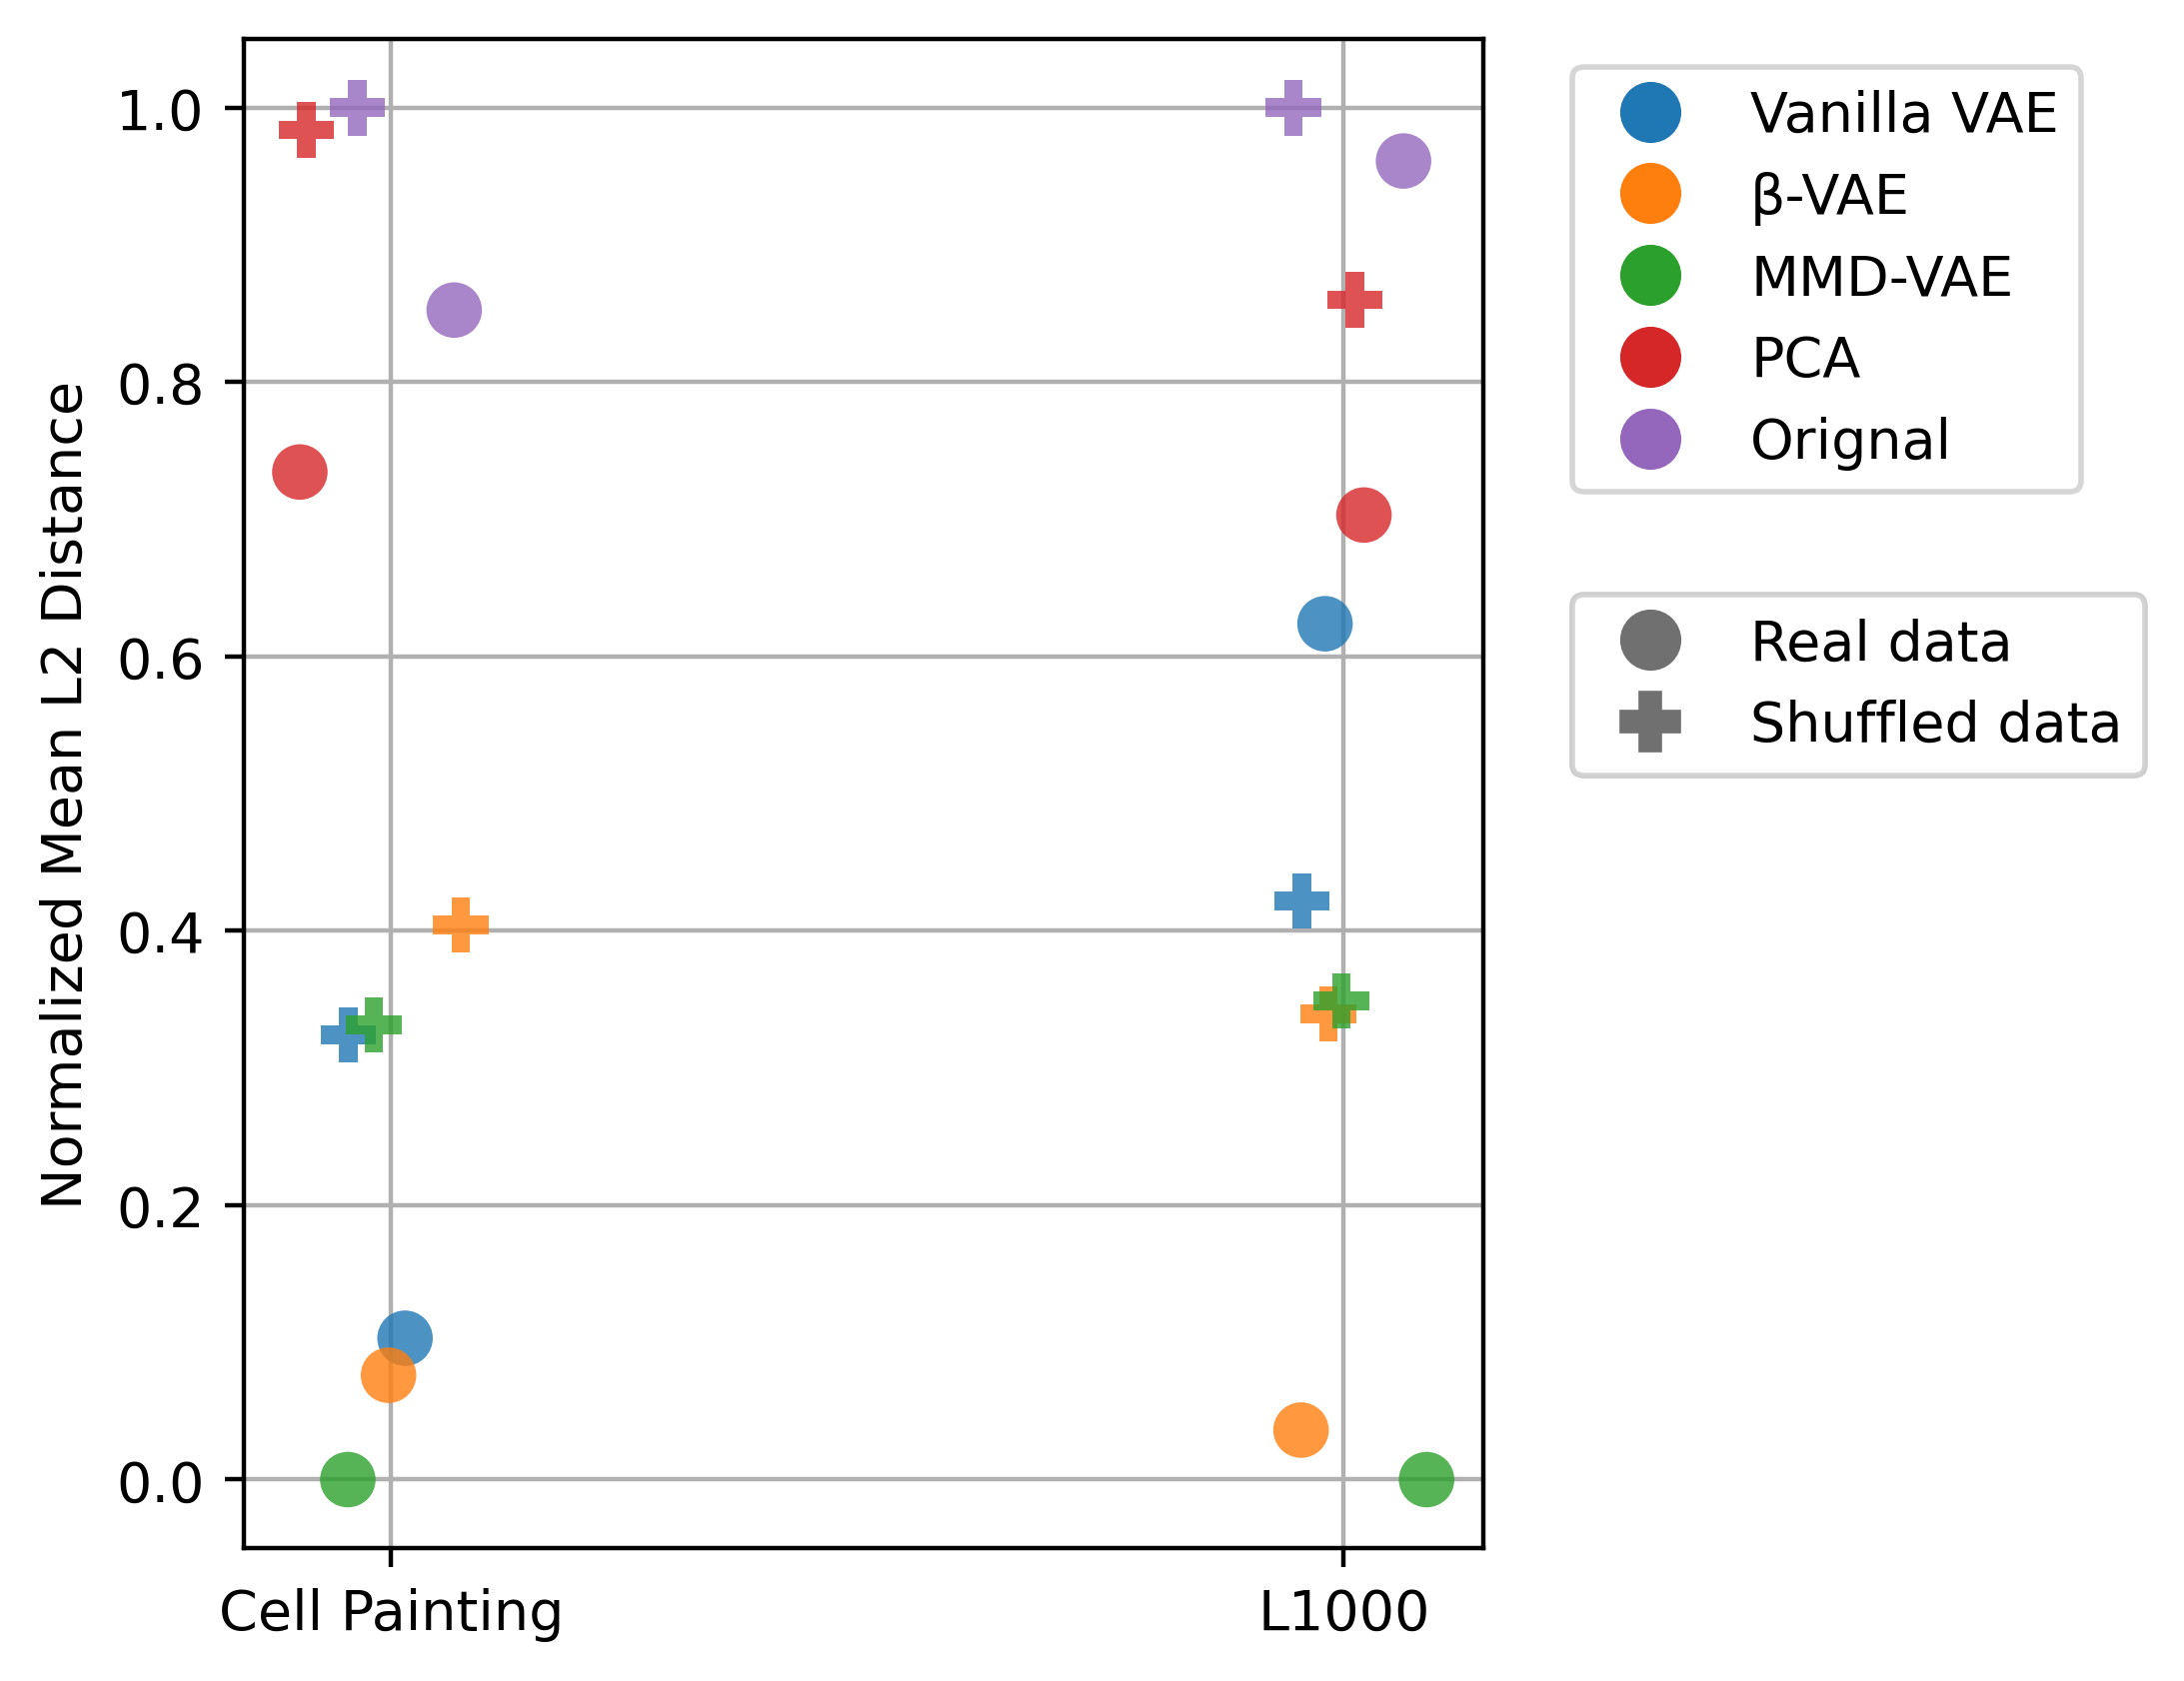

In [33]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(4,5),dpi = 400)
# for model in combined_L2_data:
#     plt.scatter(combined_L2_data[model].keys(), combined_L2_data[model].values(), label = model, marker = 'o', s=140)

sns.stripplot(data = combined_L2_data_df[~combined_L2_data_df['shuffled']], x = 'dataset', y = 'L2', 
              hue = 'model', 
              jitter = True, 
              s= 10,
              alpha = 0.8)

sns.stripplot(data = combined_L2_data_df[combined_L2_data_df['shuffled']], x = 'dataset', y = 'L2', 
              hue = 'model', 
              jitter = True, 
              s= 10, 
              marker = 'P',
              alpha = 0.8)


ax.set(ylabel = "Normalized Mean L2 Distance")
ax.set(xlabel = "")

colors = sns.color_palette()
texts = combined_L2_data_df.model.to_list()[:10:2]
print(texts)
patches = []
for i in range(len(texts)):
    patches.append(plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[int(i)], 
        label="{:s}".format(texts[i]) )[0])
    

shuffled_patches = []
shuffled_patches.append(plt.plot([],[], marker="o", ms=10, ls="", mec=None, color = '#707070',
        label="{:s}".format("Real data") )[0])
shuffled_patches.append(plt.plot([],[], marker="P", ms=10, ls="", mec=None, color = '#707070',
        label="{:s}".format("Shuffled data") )[0])
    
legend1 = plt.legend(handles=patches, bbox_to_anchor=(1.05, 1))
legend2 = plt.legend(handles=shuffled_patches, bbox_to_anchor=(1.05, 0.65))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.grid()
plt.show()

['Vanilla VAE', 'β-VAE', 'MMD-VAE', 'PCA', 'Orignal']


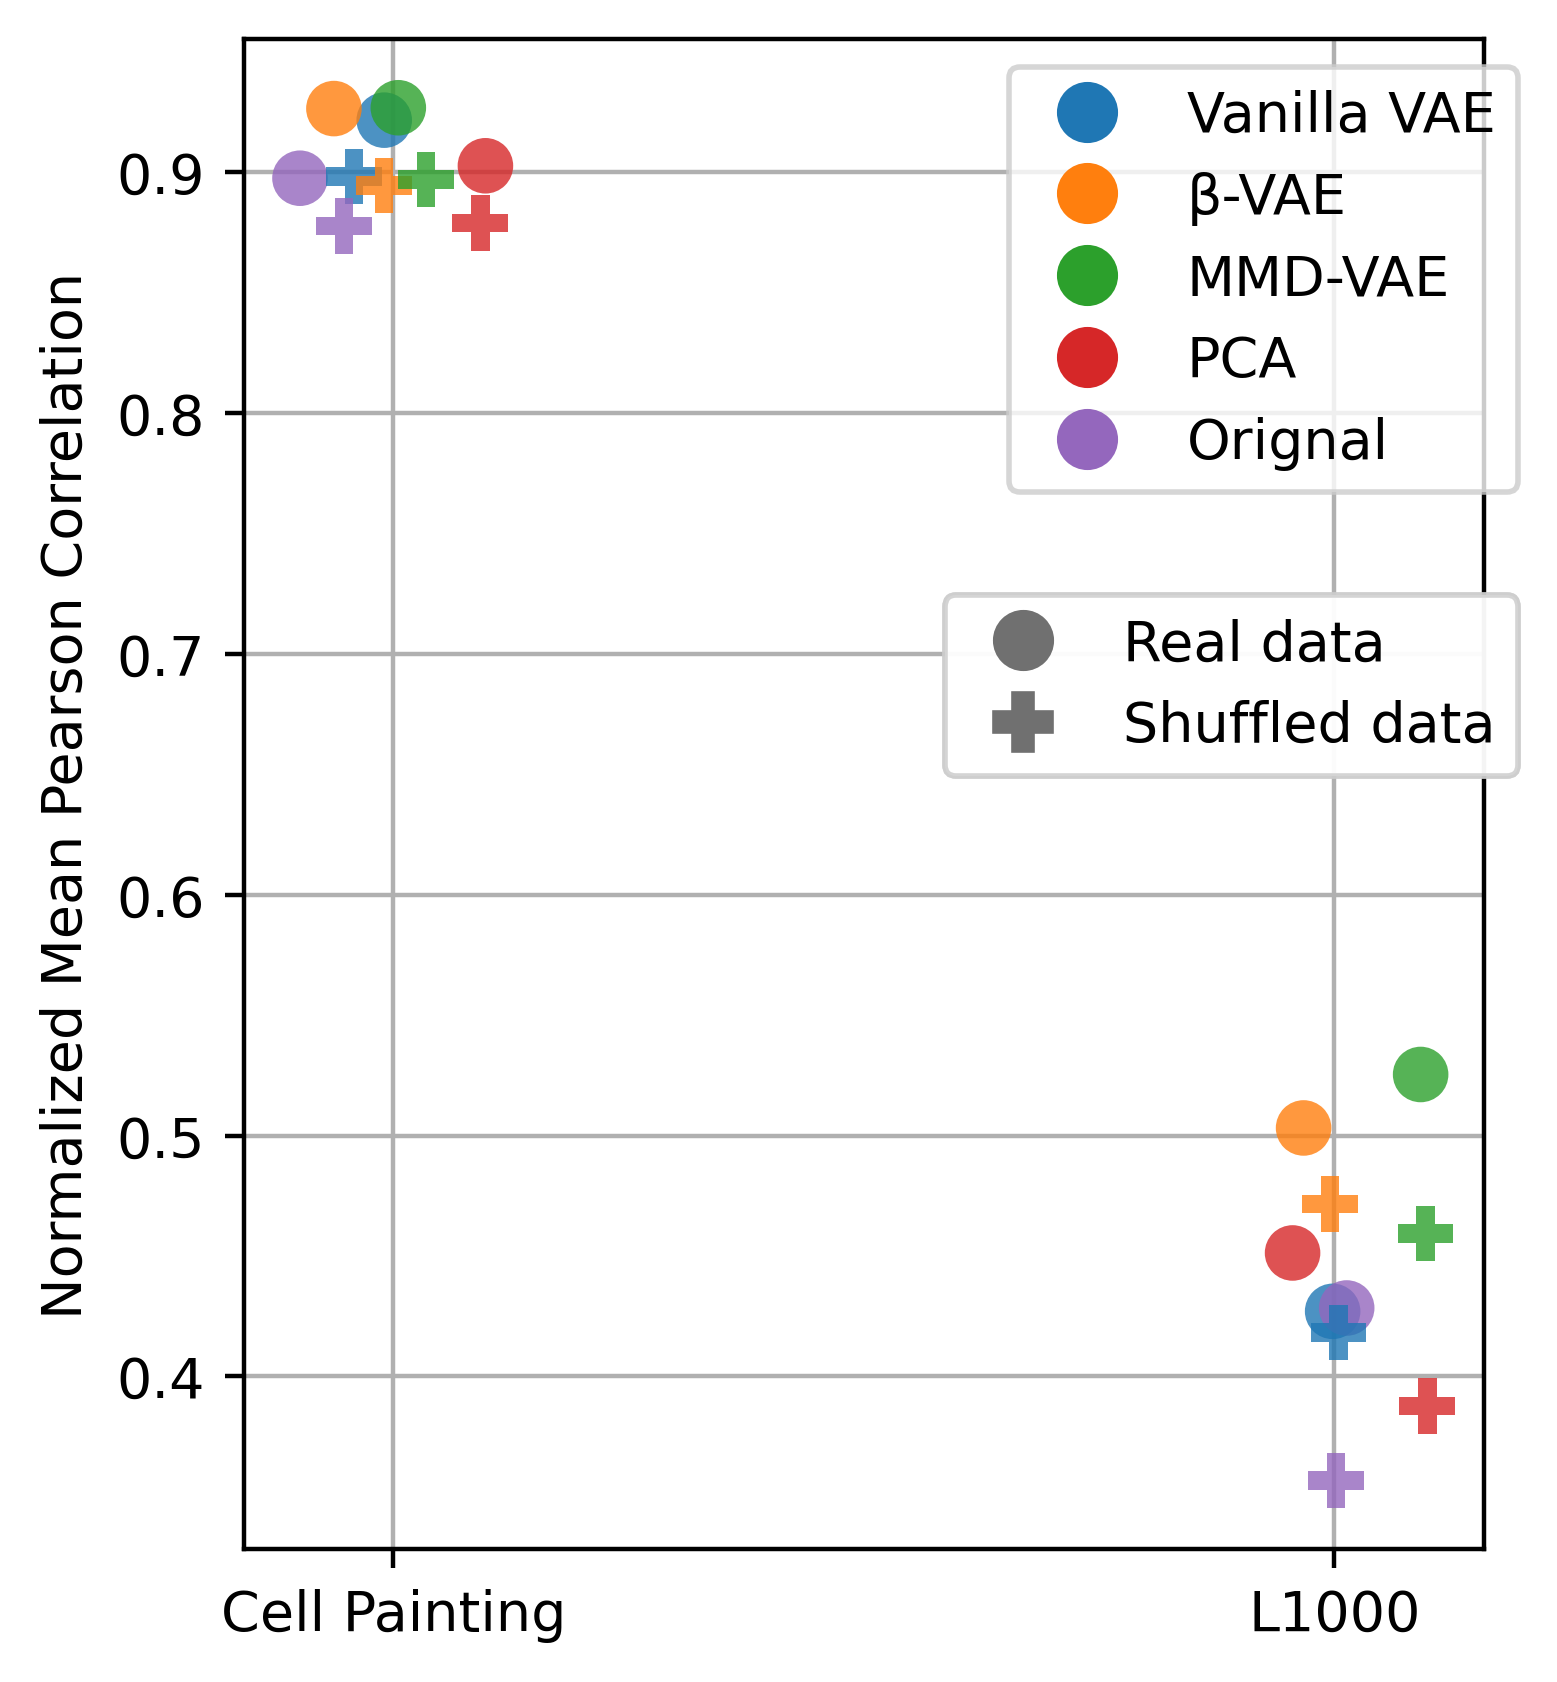

In [5]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(4,5),dpi = 400)
# for model in combined_L2_data:
#     plt.scatter(combined_L2_data[model].keys(), combined_L2_data[model].values(), label = model, marker = 'o', s=140)

sns.stripplot(data = combined_L2_data_df[~combined_L2_data_df['shuffled']], x = 'dataset', y = 'L2', 
              hue = 'model', 
              jitter = True, 
              s= 10,
              alpha = 0.8)

sns.stripplot(data = combined_L2_data_df[combined_L2_data_df['shuffled']], x = 'dataset', y = 'L2', 
              hue = 'model', 
              jitter = True, 
              s= 10, 
              marker = 'P',
              alpha = 0.8)


ax.set(ylabel = "Normalized Mean Pearson Correlation")
ax.set(xlabel = "")

colors = sns.color_palette()
texts = combined_L2_data_df.model.to_list()[:10:2]
print(texts)
patches = []
for i in range(len(texts)):
    patches.append(plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[int(i)], 
        label="{:s}".format(texts[i]) )[0])
    

shuffled_patches = []
shuffled_patches.append(plt.plot([],[], marker="o", ms=10, ls="", mec=None, color = '#707070',
        label="{:s}".format("Real data") )[0])
shuffled_patches.append(plt.plot([],[], marker="P", ms=10, ls="", mec=None, color = '#707070',
        label="{:s}".format("Shuffled data") )[0])
    
legend1 = plt.legend(handles=patches, bbox_to_anchor=(1.05, 1))
legend2 = plt.legend(handles=shuffled_patches, bbox_to_anchor=(1.05, 0.65))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.grid()
plt.show()

In [ ]:
datasets = ['level5', 'level4', 'L1000']
models = ['_vanilla','','_mmd']

model_names = ['Vanilla VAE','β-VAE','MMD-VAE','PCA','Original']

summary_df = pd.DataFrame()
for dataset in datasets:
    row = pd.DataFrame()
    for model in models:
        if dataset != 'L1000':
            L2_mean = pd.DataFrame(pd.read_csv('L2_general_' + dataset + model + '.tsv', sep='\t').drop('Unnamed: 0', axis = 1).mean()).transpose()
            L2_std = pd.DataFrame(pd.read_csv('L2_general_' + dataset + model + '.tsv', sep='\t').drop('Unnamed: 0', axis = 1).std()).transpose()

        else:
            L2_mean = pd.DataFrame(pd.read_csv('../../L1000/3.application/L2_general' + model  + '.tsv', sep='\t').drop('Unnamed: 0', axis = 1).mean()).transpose()
            L2_std = pd.DataFrame(pd.read_csv('../../L1000/3.application/L2_general' + model  + '.tsv', sep='\t').drop('Unnamed: 0', axis = 1).std()).transpose()
                

        L2_mean = L2_mean.round(2).astype(str)
        L2_std = L2_std.round(2).astype(str)
        
        L2_mean = L2_mean + ' ± ' + L2_std

        if dataset == 'level4':
            L2_mean.index = ['Cell Painting Level 4']
        if dataset == 'level5':
            L2_mean.index = ['Cell Painting Level 5']
        if dataset == 'L1000':
            L2_mean.index = ['L1000']
        
        if model != '_mmd':
            row = pd.concat([row, L2_mean[['VAE Unshuffled','VAE Shuffled']]], axis = 1)
        else:
            row = pd.concat([row, L2_mean], axis = 1)
            
        if model == '':
            row = row.rename(columns = {"VAE Unshuffled": 'β-VAE'})
            row = row.rename(columns = {"VAE Shuffled": 'β-VAE Shuffled'})
        if model == '_mmd':
            row = row.rename(columns = {"VAE Unshuffled": 'MMD-VAE'})
            row = row.rename(columns = {"VAE Shuffled": 'MMD-VAE Shuffled'})
            row = row.rename(columns = {"Complete Unshuffled": 'Original'})
            row = row.rename(columns = {"Complete Shuffled": 'Original Shuffled'})
        if model == '_vanilla':
            row = row.rename(columns = {"VAE Unshuffled": 'Vanilla VAE'})
            row = row.rename(columns = {"VAE Shuffled": 'Vanilla VAE Shuffled'})

            
    summary_df= summary_df.append(row)



In [ ]:
summary_df

In [ ]:
summary_df.to_csv('LSA_summary_results.csv')